In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Data Cleaning:

In [3]:
import numpy as np
import pandas as pd

In [117]:
#load 2021 data:
df = pd.read_csv("NYPD_Complaint_Data_Current__Year_To_Date_.csv")
df = df[['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'LAW_CAT_CD', 'Latitude', 'Longitude']].copy()
df.columns = ['Date', 'Time', 'Level_of_offense', 'Latitude', 'Longitude']

In [118]:
#load historical data:
hist_df = pd.read_csv("NYPD_Complaint_Data_Historic.csv")
hist_df = hist_df[['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'LAW_CAT_CD', 'Latitude', 'Longitude']].copy()
hist_df.columns = ['Date', 'Time', 'Level_of_offense', 'Latitude', 'Longitude']

/Users/zeqi.w/anaconda3/envs/py_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [119]:
hist_df['Date'] = pd.to_datetime(hist_df['Date'], errors = 'coerce')
hist_df = hist_df.dropna()

df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')
df = df.dropna()

In [120]:
hist_df['Year'] = hist_df['Date'].dt.year
df['Year'] = df['Date'].dt.year

In [121]:
hist_df.shape

(7357833, 6)

In [1]:
7357833 + 323813

7681646

In [122]:
df.shape

(323813, 6)

In [123]:
hist_df.isnull().sum()

Date                0
Time                0
Level_of_offense    0
Latitude            0
Longitude           0
Year                0
dtype: int64

In [124]:
df.isnull().sum()

Date                0
Time                0
Level_of_offense    0
Latitude            0
Longitude           0
Year                0
dtype: int64

In [135]:
df = df.loc[df['Year']==2021].copy()

In [138]:
hist_df = hist_df.loc[hist_df['Year']>=2006].copy()

In [144]:
cleaned_df = pd.concat([df,hist_df]).reset_index(drop=True).copy()

In [145]:
cleaned_df.groupby('Year').count()

Date    Time  Level_of_offense  Latitude  Longitude
Year                                                       
2006  512668  512668            512668    512668     512668
2007  535126  535126            535126    535126     535126
2008  528774  528774            528774    528774     528774
2009  511125  511125            511125    511125     511125
2010  510266  510266            510266    510266     510266
2011  498727  498727            498727    498727     498727
2012  504823  504823            504823    504823     504823
2013  495926  495926            495926    495926     495926
2014  492101  492101            492101    492101     492101
2015  478697  478697            478697    478697     478697
2016  478149  478149            478149    478149     478149
2017  467776  467776            467776    467776     467776
2018  461865  461865            461865    461865     461865
2019  457543  457543            457543    457543     457543
2020  404892  404892            404892    404892     404892
2021  314823  314823            314823    314823     314823

In [146]:
cleaned_df.to_csv("crime_data_cleaned_2006_to_2021.csv")

## Read cleaned data

In [25]:
df = pd.read_csv("crime_data_cleaned_2006_to_2021.csv", index_col=0)

/Users/zeqi.w/anaconda3/envs/py_env/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [26]:
df['Date'] = pd.to_datetime(df['Date'])

In [28]:
df['Month'] = df['Date'].dt.month

In [29]:
df.shape

(7653281, 7)

In [30]:
df.head()

Date      Time Level_of_offense   Latitude  Longitude  Year  Month
0 2021-09-29  12:50:00           FELONY  40.853507 -73.882203  2021      9
1 2021-09-16  05:15:00           FELONY  40.696329 -73.937711  2021      9
2 2021-09-15  01:13:00           FELONY  40.805364 -73.937663  2021      9
3 2021-09-07  19:35:00           FELONY  40.892351 -73.856440  2021      9
4 2021-09-03  20:35:00           FELONY  40.887303 -73.845167  2021      9

In [31]:
count_df = df.groupby('Year').count()[['Date']].copy()
count_df.columns = ['Total Num']

In [32]:
count_df.T

Year         2006    2007    2008    2009    2010    2011    2012    2013  \
Total Num  512668  535126  528774  511125  510266  498727  504823  495926   

Year         2014    2015    2016    2017    2018    2019    2020    2021  
Total Num  492101  478697  478149  467776  461865  457543  404892  314823

In [33]:
count_month_df = df.groupby(['Year','Month']).count()[['Date']].copy()
count_month_df.columns = ['Total Num']

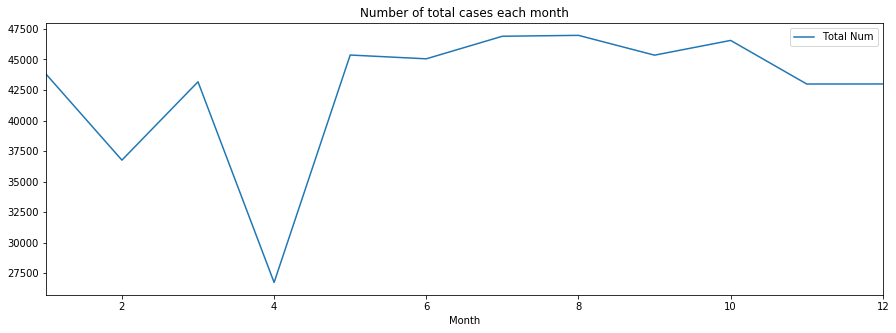

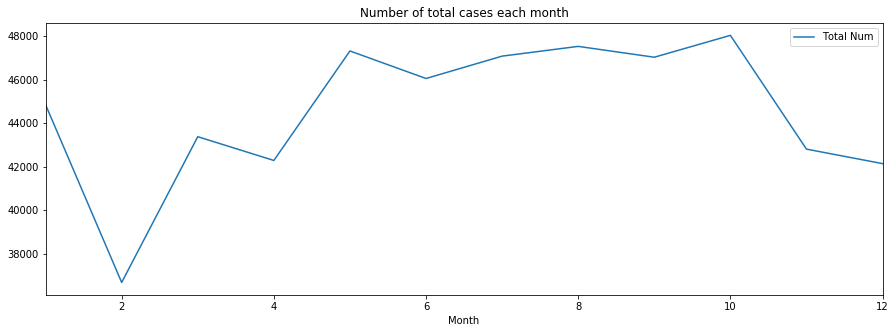

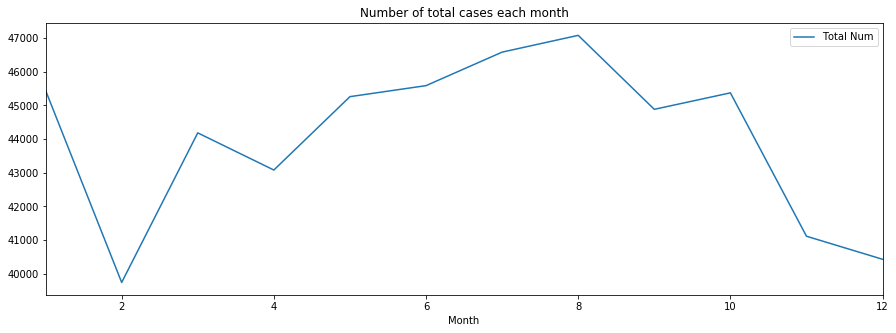

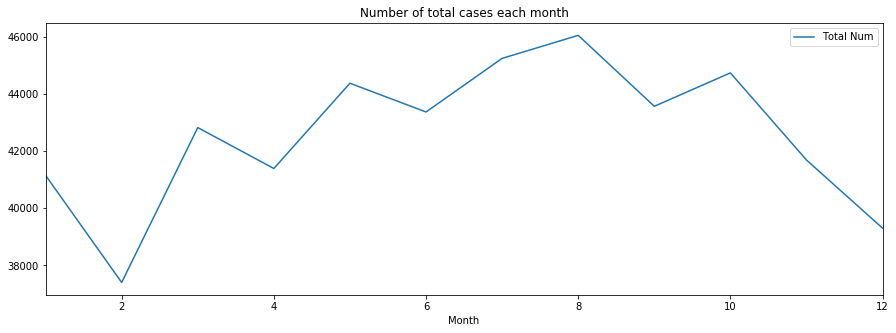

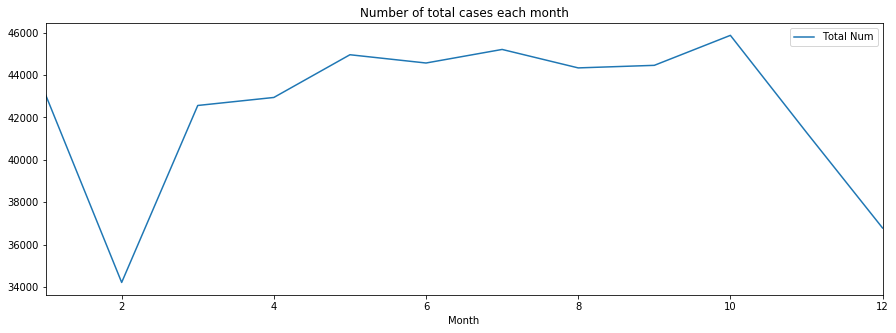

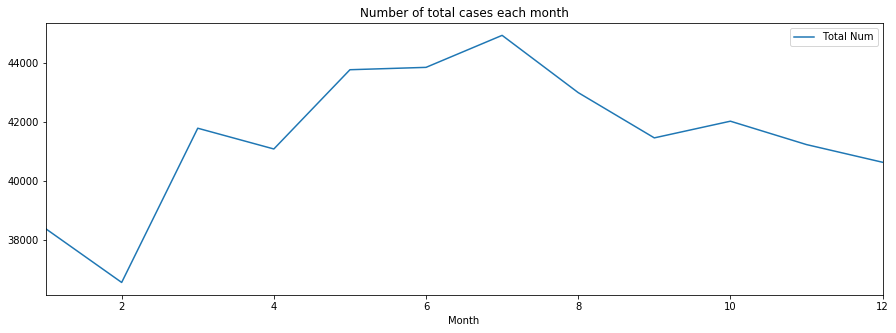

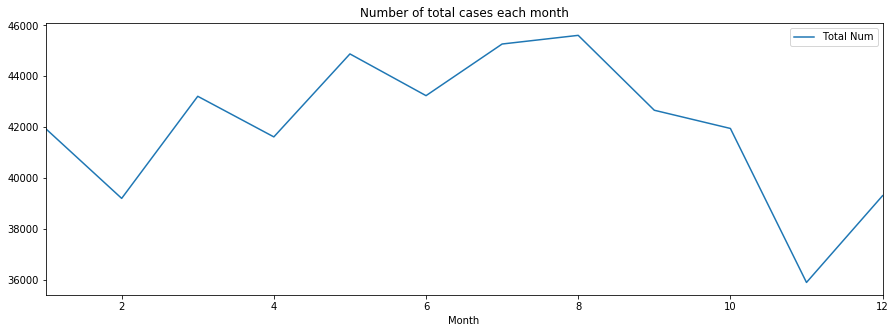

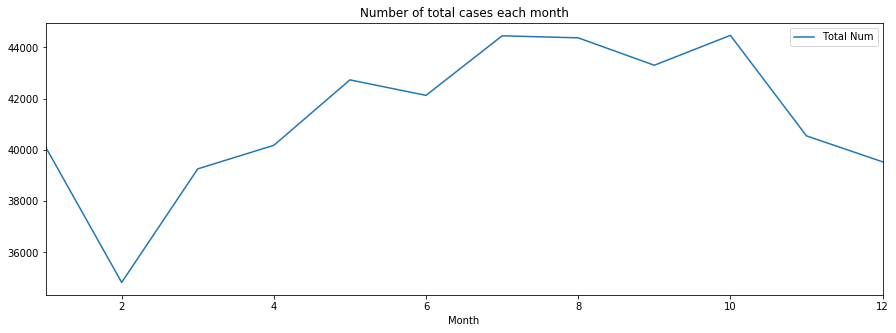

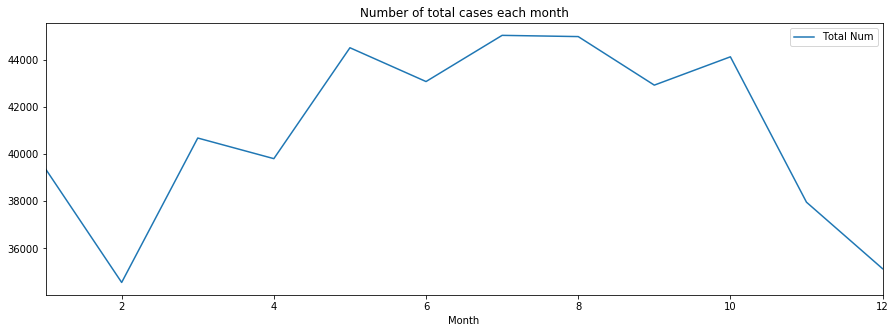

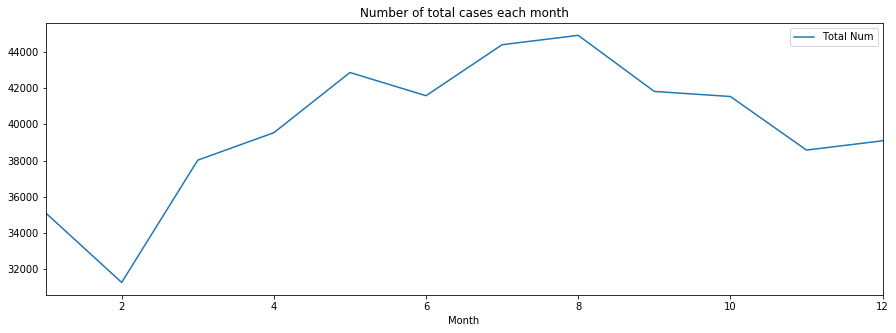

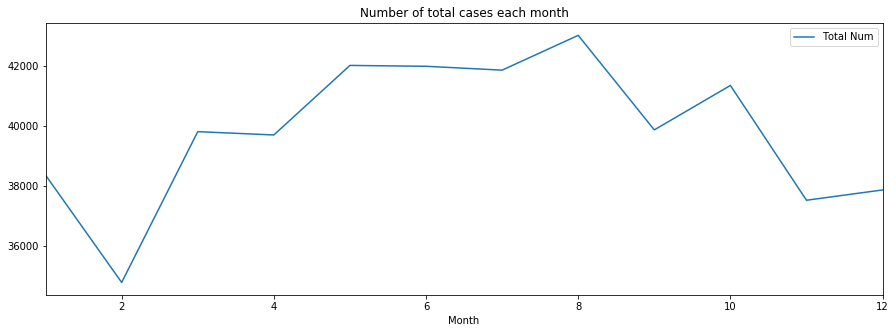

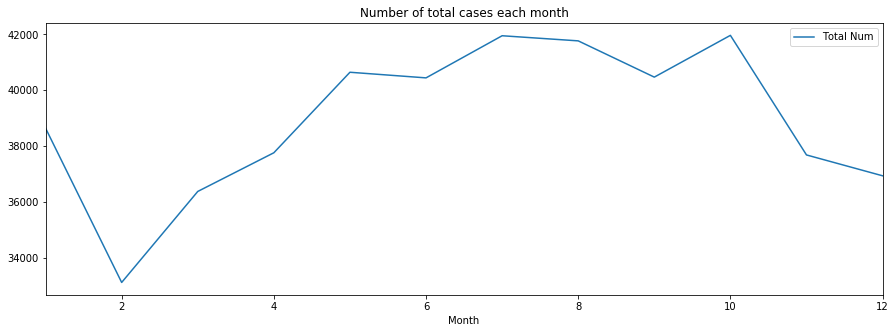

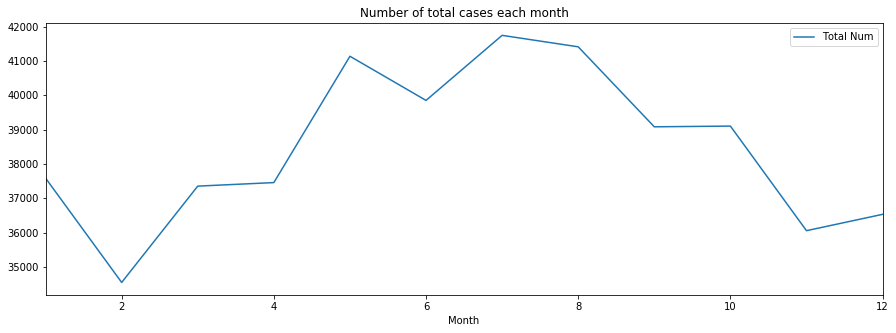

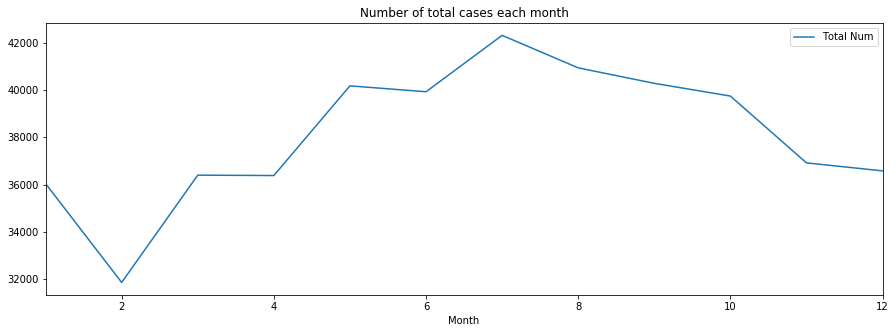

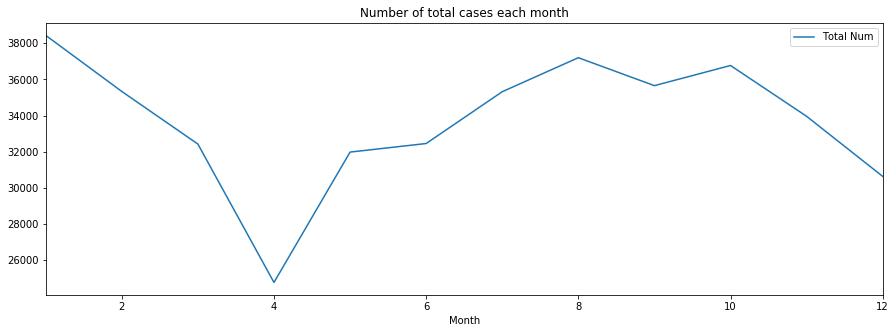

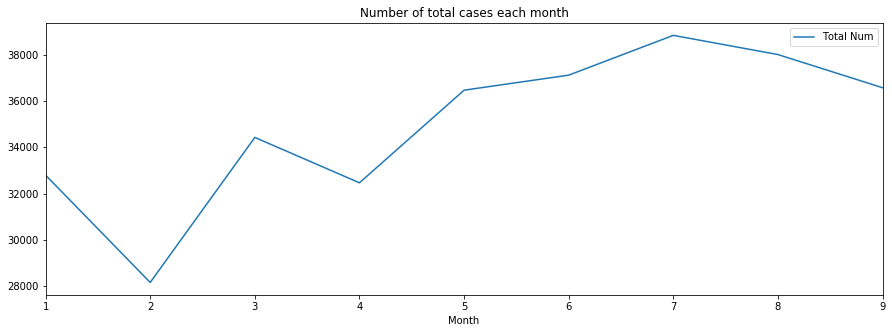

In [41]:
count_month_df.reset_index().groupby('Year').plot(x='Month', y='Total Num', figsize=(15,5), title='Number of total cases each month');

## Visualize:

In [12]:
# import libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

In [13]:
# import street map
street_map = gpd.read_file('geo_export_8d2f8abd-a496-4660-bc87-d1d5859eba32.shp')

In [14]:
# designate coordinate system
crs = {'init':'epsg:4326'}
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

In [15]:
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)

/Users/zeqi.w/anaconda3/envs/py_env/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [16]:
geo_df.head()

Date      Time Level_of_offense   Latitude  Longitude  Year  \
0 2021-09-29  12:50:00           FELONY  40.853507 -73.882203  2021   
1 2021-09-16  05:15:00           FELONY  40.696329 -73.937711  2021   
2 2021-09-15  01:13:00           FELONY  40.805364 -73.937663  2021   
3 2021-09-07  19:35:00           FELONY  40.892351 -73.856440  2021   
4 2021-09-03  20:35:00           FELONY  40.887303 -73.845167  2021   

                     geometry  
0  POINT (-73.88220 40.85351)  
1  POINT (-73.93771 40.69633)  
2  POINT (-73.93766 40.80536)  
3  POINT (-73.85644 40.89235)  
4  POINT (-73.84517 40.88730)

In [21]:
geo_df[(geo_df['Level_of_offense'] == 'Violation')]

Empty GeoDataFrame
Columns: [Date, Time, Level_of_offense, Latitude, Longitude, Year, geometry]
Index: []

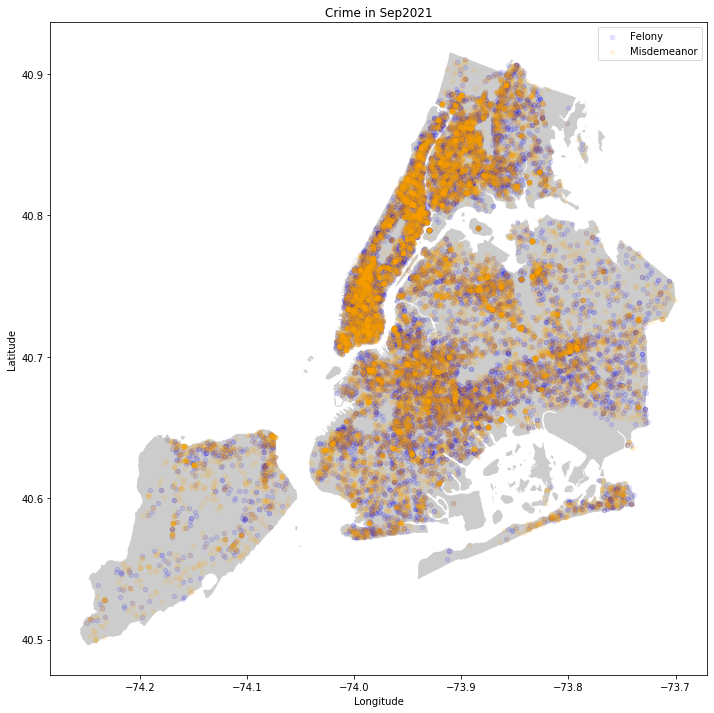

In [25]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax = ax, alpha=0.4, color='grey');
geo_df[(geo_df['Level_of_offense'] == 'FELONY')&(geo_df['Date'] >= '2021-09-01')].plot(ax=ax, markersize=20, alpha=0.1, color='blue', marker='o', label='Felony')
geo_df[(geo_df['Level_of_offense'] == 'MISDEMEANOR')&(geo_df['Date'] >= '2021-09-01')].plot(ax=ax, markersize=20, alpha=0.1, color='orange', marker='o', label='Misdemeanor')
# geo_df[(geo_df['Level_of_offense'] == 'Violation')&(geo_df['Date'] >= '2021-09-01')].plot(ax=ax, markersize=20, alpha=0.1, color='blue', marker='o', label='Violation')
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Crime in Sep2021");

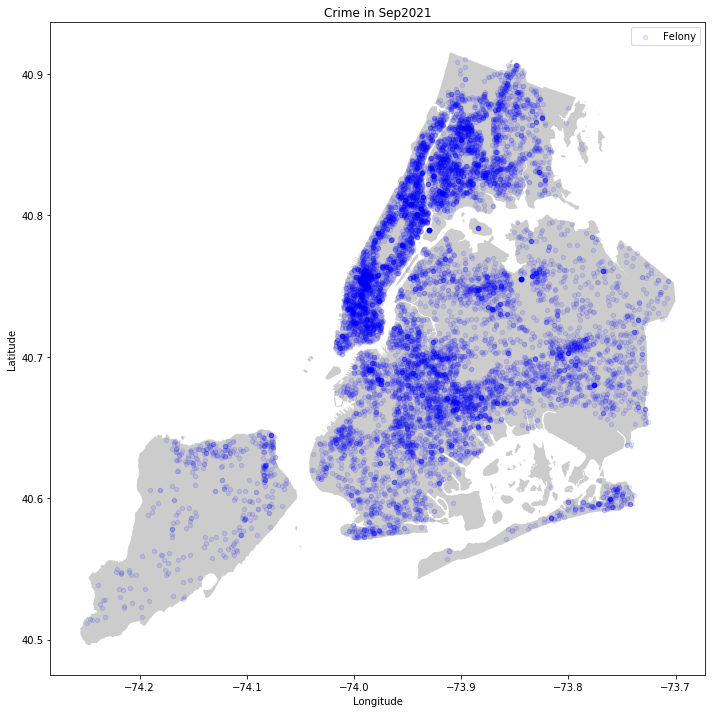

In [26]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax = ax, alpha=0.4, color='grey');
geo_df[(geo_df['Level_of_offense'] == 'FELONY')&(geo_df['Date'] >= '2021-09-01')].plot(ax=ax, markersize=20, alpha=0.1, color='blue', marker='o', label='Felony')
# geo_df[(geo_df['Level_of_offense'] == 'MISDEMEANOR')&(geo_df['Date'] >= '2021-09-01')].plot(ax=ax, markersize=20, alpha=0.1, color='orange', marker='o', label='Misdemeanor')
# geo_df[(geo_df['Level_of_offense'] == 'Violation')&(geo_df['Date'] >= '2021-09-01')].plot(ax=ax, markersize=20, alpha=0.1, color='blue', marker='o', label='Violation')
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Crime in Sep2021");

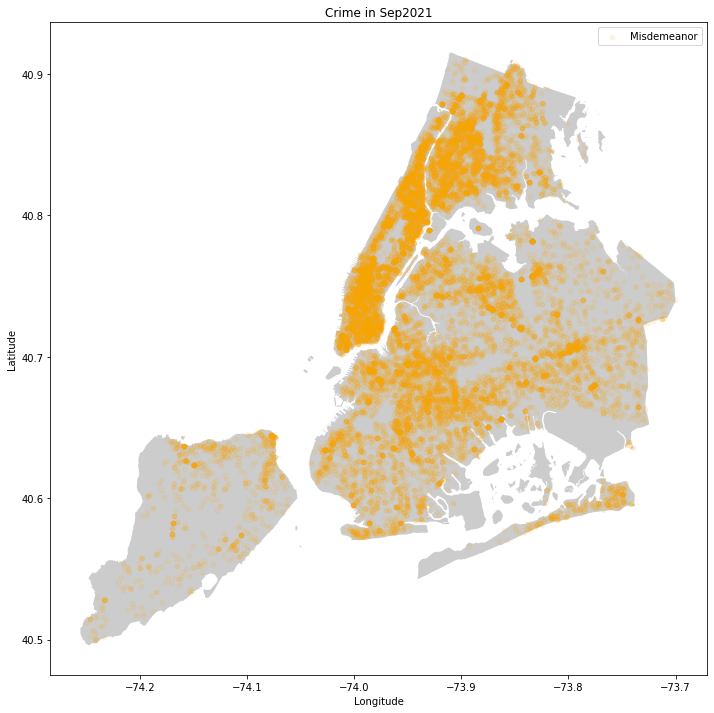

In [27]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax = ax, alpha=0.4, color='grey');
# geo_df[(geo_df['Level_of_offense'] == 'FELONY')&(geo_df['Date'] >= '2021-09-01')].plot(ax=ax, markersize=20, alpha=0.1, color='blue', marker='o', label='Felony')
geo_df[(geo_df['Level_of_offense'] == 'MISDEMEANOR')&(geo_df['Date'] >= '2021-09-01')].plot(ax=ax, markersize=20, alpha=0.1, color='orange', marker='o', label='Misdemeanor')
# geo_df[(geo_df['Level_of_offense'] == 'Violation')&(geo_df['Date'] >= '2021-09-01')].plot(ax=ax, markersize=20, alpha=0.1, color='blue', marker='o', label='Violation')
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Crime in Sep2021");